Data Exploration:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datetime import datetime as dt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

Importing the data from the file

In [2]:
df = pd.read_csv("/Users/sahana/Desktop/University/ML/HW1Program/KaggleV2-May-2016.csv")

In [3]:
data_frame = df.sample(frac = 1)

Checking for null or missing values in the data

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Converting the "PatientID" to integer type 

In [5]:
df['PatientId'] = df['PatientId'].astype(int)

Checking for any duplicate values in the code

In [6]:
# Checking for duplicate rows if any
df.duplicated().any()


False

Checking if appointment ID is duplicated. As appointment ID has to be unique

In [7]:
df.AppointmentID.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Name: AppointmentID, Length: 110527, dtype: bool

Checking if other values in the data are valid

In [8]:
# Checking if the values are of the correct type
df.query('PatientId < 0')
df.query('AppointmentID < 0')
df.query('Gender != "F" and Gender != "M"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Converting Scheduled Day and AppointmentDay into date data types to find the interval between 
them to check if it has any impact on No show

In [9]:
# Cleaning the data for ScheduledDay and AppointmentDay so that we can validate if the data is correct 
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).apply(dt.date)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).apply(dt.date)
day_meet_doctor = pd.to_datetime(df['AppointmentDay']).apply(dt.date)
day_schedule_appointment = pd.to_datetime(df['ScheduledDay']).apply(dt.date)
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Checking if time interval has negative values

In [10]:
integer_days = lambda x: x.days
df['TimeIntervalDuringAppointment'] = (day_meet_doctor - day_schedule_appointment).apply(integer_days)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeIntervalDuringAppointment
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,35
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,35
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,41
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,41


In [11]:
df.query('TimeIntervalDuringAppointment < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeIntervalDuringAppointment
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


Dropping the columns with negative time interval during appointment

In [12]:
df = df.drop(27033)
df = df.drop(55226)
df = df.drop(64175)
df = df.drop(71533)
df = df.drop(72362)

Checking if Age is negative

In [13]:

df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeIntervalDuringAppointment
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,0


In [14]:
# dropping age with negative value
df = df.drop(99832)

In [15]:
# Checking for validity of other values
df.query('Scholarship != 0 and Scholarship != 1')
df.query('Hipertension != 0 and Hipertension != 1')
df.query('Diabetes != 0 and Diabetes != 1')
df.query('Alcoholism != 0 and Alcoholism != 1')
df.query('Handcap != 0 and Handcap != 1')
df.query('SMS_received != 0 and SMS_received != 1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeIntervalDuringAppointment


In [16]:
# Dropping Attributes/ Features that are not neccessary
df = df.drop('ScheduledDay', 1)
df = df.drop('AppointmentDay', 1)
# No valuable information from appointmentID
df = df.drop('AppointmentID', 1)

Pie chart showing distribution of all values with respect to no show

array([<AxesSubplot:ylabel='PatientId'>, <AxesSubplot:ylabel='Age'>,
       <AxesSubplot:ylabel='Scholarship'>,
       <AxesSubplot:ylabel='Hipertension'>,
       <AxesSubplot:ylabel='Diabetes'>, <AxesSubplot:ylabel='Alcoholism'>,
       <AxesSubplot:ylabel='Handcap'>,
       <AxesSubplot:ylabel='SMS_received'>,
       <AxesSubplot:ylabel='TimeIntervalDuringAppointment'>], dtype=object)

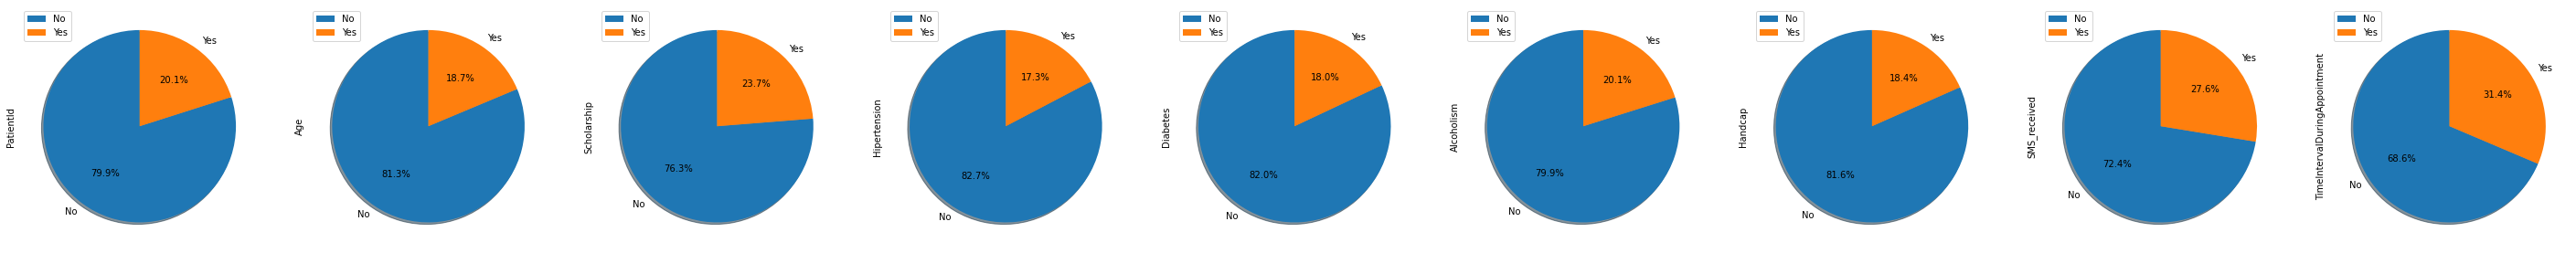

In [17]:
df.groupby(['No-show']).sum().plot(kind='pie', subplots=True,shadow = True,startangle=90,
figsize=(50,10), autopct='%1.1f%%')

Displaying Data Distribution with respect to No show

In [18]:
df.groupby(['Gender', 'No-show'])[['No-show']].count()

No-show
Gender No-show         
F      No         57245
       Yes        14591
M      No         30962
       Yes         7723

<AxesSubplot:xlabel='Gender', ylabel='Count'>

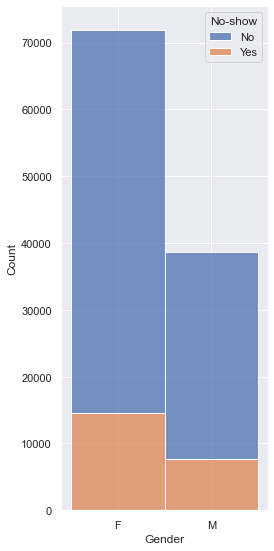

In [19]:
# Is there any specific relationship between gender and no-show
#  % of male and % female in the dataset (pie chart)
# Maybe woman dont have access to transportation
sns.set(rc={'figure.figsize':(3.7,9.27)})
sns.histplot(data=df, x='Gender', stat='count', hue='No-show', multiple='stack')


In [20]:
df.groupby(['PatientId', 'No-show'])[['No-show']].count()

,,No-show
PatientId,No-show,
39217,No,1
43741,No,1
93779,No,1
141724,No,1
537615,No,1
...,...,...
999931985292928,No,5
999934989273974,No,1
999946536742891,No,1


In [21]:
df.groupby(['TimeIntervalDuringAppointment', 'No-show'])[['No-show']].count()

No-show
TimeIntervalDuringAppointment No-show         
0                             No         36770
                              Yes         1792
1                             No          4100
                              Yes         1113
2                             No          5123
...                                        ...
169                           Yes            1
176                           No            10
                              Yes            6
179                           No             8
                              Yes            2

[235 rows x 1 columns]

<AxesSubplot:xlabel='TimeIntervalDuringAppointment', ylabel='Count'>

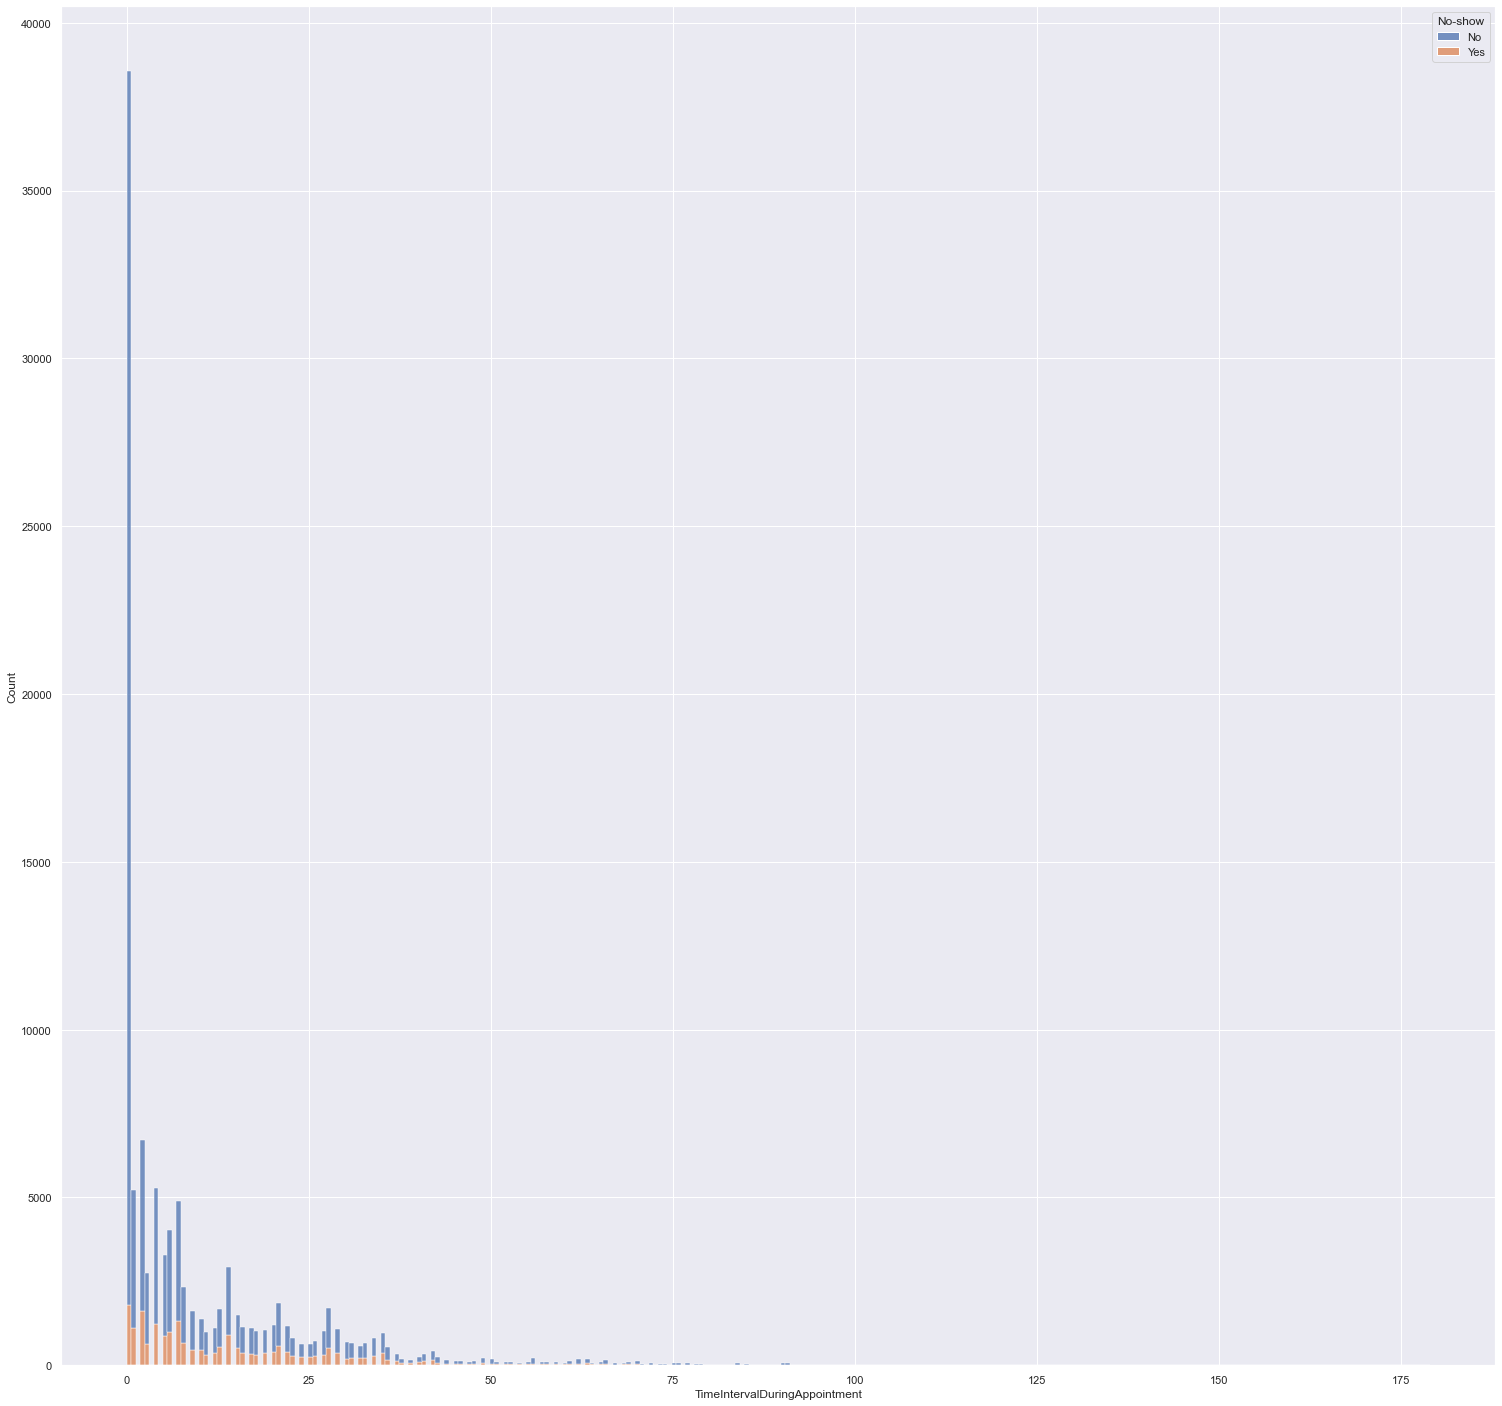

In [22]:
sns.set(rc={'figure.figsize':(25.7,25)})
sns.histplot(data=df, x='TimeIntervalDuringAppointment', stat='count', hue='No-show', multiple='stack')

In [23]:
df.groupby(['Scholarship', 'No-show'])[['No-show']].count()

No-show
Scholarship No-show         
0           No         79924
            Yes        19736
1           No          8283
            Yes         2578

<AxesSubplot:xlabel='Scholarship', ylabel='Count'>

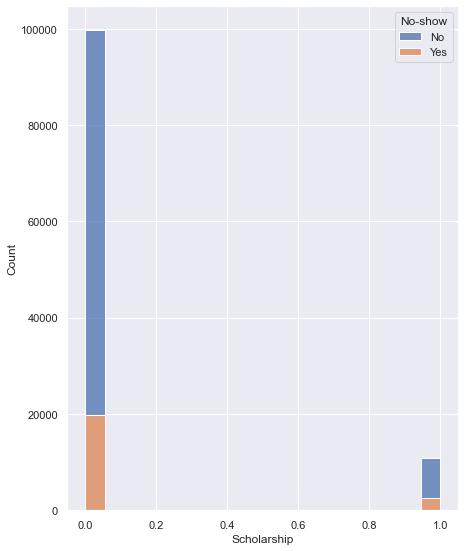

In [24]:
sns.set(rc={'figure.figsize':(7,9.27)})
sns.histplot(data=df, x='Scholarship', stat='count', hue='No-show', multiple='stack')

In [25]:
df.groupby(['Hipertension', 'No-show'])[['No-show']].count()

No-show
Hipertension No-show         
0            No         70178
             Yes        18542
1            No         18029
             Yes         3772

<AxesSubplot:xlabel='No-show', ylabel='Count'>

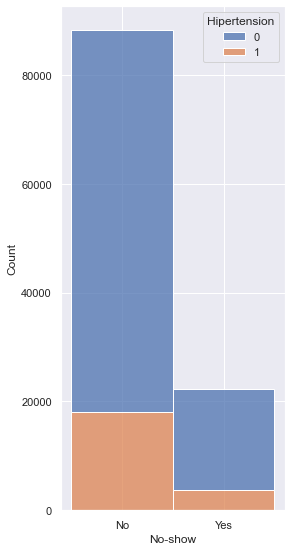

In [26]:
sns.set(rc={'figure.figsize':(4,9.27)})
sns.histplot(data=df, x='No-show', stat='count', hue='Hipertension', multiple='stack')

In [27]:
df.groupby(['Diabetes', 'No-show'])[['No-show']].count()

No-show
Diabetes No-show         
0        No         81694
         Yes        20884
1        No          6513
         Yes         1430

<AxesSubplot:xlabel='No-show', ylabel='Count'>

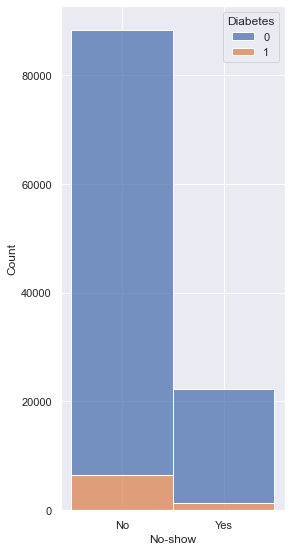

In [28]:
sns.set(rc={'figure.figsize':(4,9.27)})
sns.histplot(data=df, x='No-show', stat='count', hue='Diabetes', multiple='stack')

In [29]:
df.groupby(['Alcoholism', 'No-show'])[['No-show']].count()

No-show
Alcoholism No-show         
0          No         85524
           Yes        21637
1          No          2683
           Yes          677

<AxesSubplot:xlabel='No-show', ylabel='Count'>

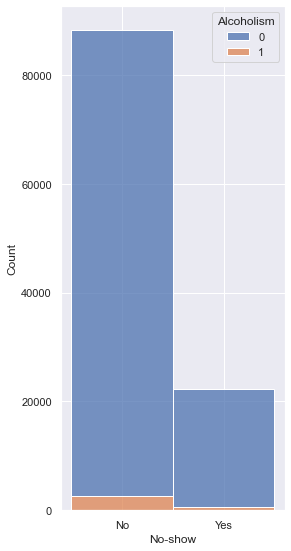

In [30]:
sns.set(rc={'figure.figsize':(4,9.27)})
sns.histplot(data=df, x='No-show', stat='count', hue='Alcoholism', multiple='stack')

In [31]:
df.groupby(['Handcap', 'No-show'])[['No-show']].count()

No-show
Handcap No-show         
0       No         86373
        Yes        21909
1       No          1676
        Yes          364
2       No           146
        Yes           37
3       No            10
        Yes            3
4       No             2
        Yes            1

<AxesSubplot:xlabel='No-show', ylabel='Count'>

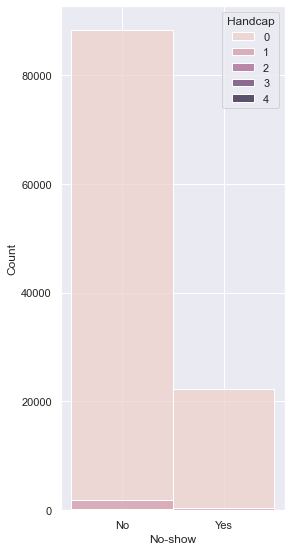

In [32]:
sns.set(rc={'figure.figsize':(4,9.27)})
sns.histplot(data=df, x='No-show', stat='count', hue='Handcap', multiple='stack')

In [33]:
df.groupby(['SMS_received', 'No-show'])[['No-show']].count()

No-show
SMS_received No-show         
0            No         62509
             Yes        12530
1            No         25698
             Yes         9784

<AxesSubplot:xlabel='No-show', ylabel='Count'>

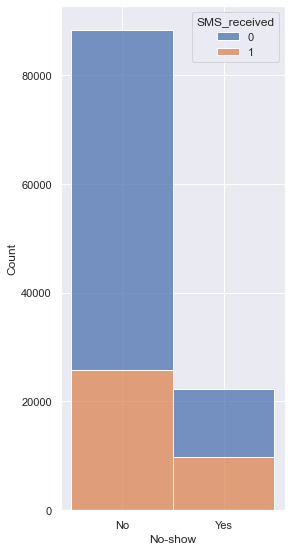

In [34]:
sns.set(rc={'figure.figsize':(4,9.27)})
sns.histplot(data=df, x='No-show', stat='count', hue='SMS_received', multiple='stack')

Categorizing Age interms of children adults and senior_citizen

In [35]:
df['Age'] = pd.cut(df['Age'], bins=[0, 18, 55, 105], include_lowest=True, labels=['children', 'adults', 'senior_citizen'])

In [36]:
df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeIntervalDuringAppointment
0,29872499824296,F,senior_citizen,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438,M,senior_citizen,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951,F,senior_citizen,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174,F,children,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183,F,senior_citizen,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [37]:
df.groupby(['Age', 'No-show'])[['No-show']].count()

No-show
Age            No-show         
children       No         22519
               Yes         6346
adults         No         42487
               Yes        11666
senior_citizen No         23199
               Yes         4299

<AxesSubplot:xlabel='No-show', ylabel='Count'>

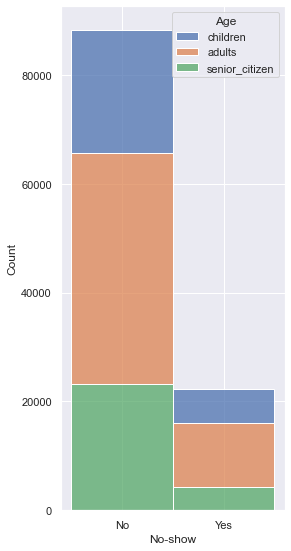

In [38]:
sns.histplot(data=df, x='No-show', stat='count', hue='Age', multiple='stack')

In [39]:
df.groupby(['Neighbourhood', 'No-show'])[['No-show']].count()

No-show
Neighbourhood   No-show         
AEROPORTO       No             7
                Yes            1
ANDORINHAS      No          1741
                Yes          521
ANTÔNIO HONÓRIO No           221
...                          ...
TABUAZEIRO      Yes          572
UNIVERSITÁRIO   No           120
                Yes           32
VILA RUBIM      No           710
                Yes          141

[160 rows x 1 columns]

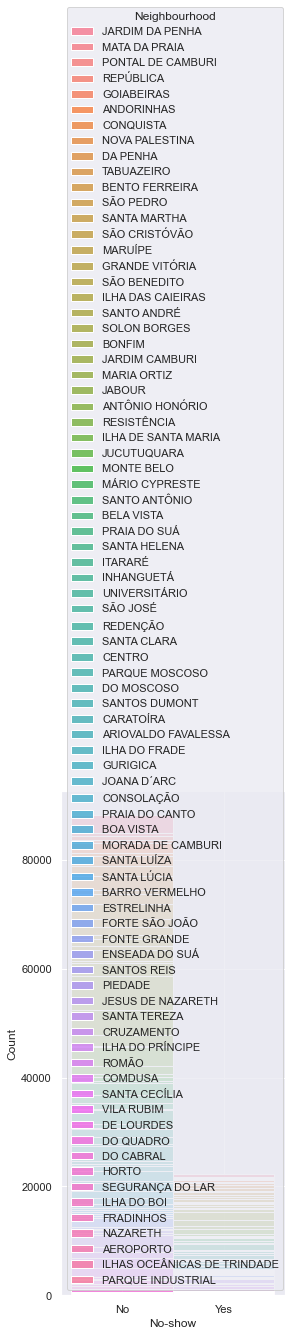

In [40]:
sns.histplot(data=df, x='No-show', stat='count', hue='Neighbourhood', multiple='stack', legend=True)
sns.set(rc = {'figure.figsize':(100,75)})

Applying One hot encoding to variables with categorical data

In [41]:
#Female is encoded as 0
# No-show - No is encoded as 0
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=False)
df['No-show'] = pd.get_dummies(df['No-show'], drop_first=False)
df['Age'] = pd.get_dummies(df['Age'], drop_first=True)
df['Neighbourhood'] = pd.get_dummies(df['Neighbourhood'], drop_first=True)
df.head()


,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeIntervalDuringAppointment
0,29872499824296,1,0,0,0,1,0,0,0,0,1,0
1,558997776694438,0,0,0,0,0,0,0,0,0,1,0
2,4262962299951,1,0,0,0,0,0,0,0,0,1,0
3,867951213174,1,0,0,0,0,0,0,0,0,1,0
4,8841186448183,1,0,0,0,1,1,0,0,0,1,0


Correaltion Matrix

In [42]:
df = pd.DataFrame(data=df, columns= df.columns)
corr = df.corr()

In [43]:
df.corr()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeIntervalDuringAppointment
PatientId,1.000000,-0.007927,0.002154,0.001183,-0.002873,-0.006431,0.001612,0.011016,-0.007855,-0.009735,0.001477,-0.001442
Gender,-0.007927,1.000000,0.118616,0.001575,0.114297,0.055721,0.032555,-0.106170,-0.022787,0.046301,-0.004132,0.028411
Age,0.002154,0.118616,1.000000,0.010440,0.081131,-0.139732,-0.108128,0.061742,-0.017695,0.036075,-0.033033,-0.004099
Neighbourhood,0.001183,0.001575,0.010440,1.000000,0.021620,0.022451,0.033757,-0.006241,0.016110,-0.021790,-0.010237,-0.013459
Scholarship,-0.002873,0.114297,0.081131,0.021620,1.000000,-0.019738,-0.024899,0.035019,-0.008555,0.001182,-0.029166,-0.030435
Hipertension,-0.006431,0.055721,-0.139732,0.022451,-0.019738,1.000000,0.433082,0.087967,0.080162,-0.006285,0.035662,-0.017236
Diabetes,0.001612,0.032555,-0.108128,0.033757,-0.024899,0.433082,1.000000,0.018471,0.057578,-0.014561,0.015158,-0.027200
Alcoholism,0.011016,-0.106170,0.061742,-0.006241,0.035019,0.087967,0.018471,1.000000,0.004668,-0.026154,0.000181,-0.038527
Handcap,-0.007855,-0.022787,-0.017695,0.016110,-0.008555,0.080162,0.057578,0.004668,1.000000,-0.024097,0.006290,-0.019774
SMS_received,-0.009735,0.046301,0.036075,-0.021790,0.001182,-0.006285,-0.014561,-0.026154,-0.024097,1.000000,-0.126502,0.398128


<AxesSubplot:>

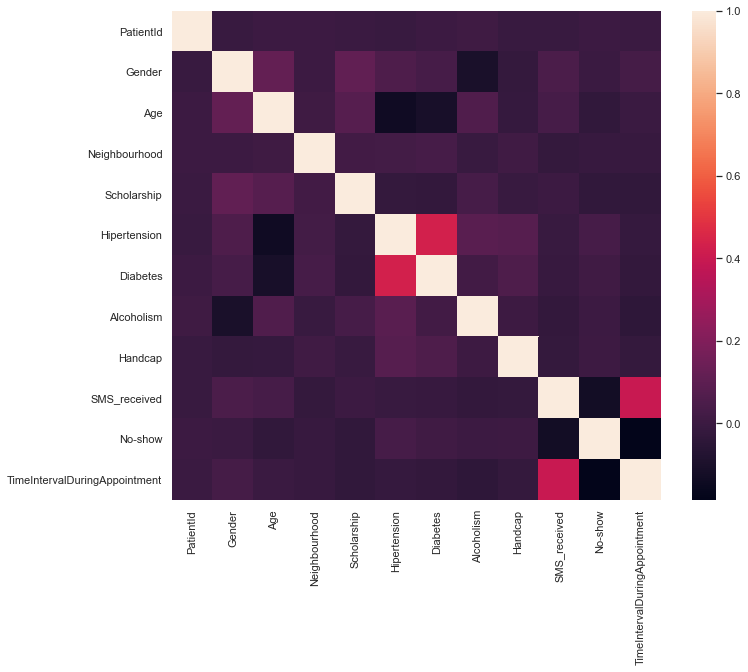

In [44]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(data=corr, square=True)

Model Building Using KFold Cross validation 

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import *
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
from sklearn import tree


kfold = KFold(n_splits=10)

In [46]:
Precison_LR = cross_val_score(LogisticRegression(), df[['Age','Alcoholism','Diabetes','PatientId','Gender',
                            'Neighbourhood','Scholarship','Hipertension', 'Handcap',
                            'SMS_received']], df['No-show'], cv=kfold, scoring="precision")
print("cross-validation Precision score for logistic regression model is:") 
print(Precison_LR)
print("Mean cross-validation Precision score for logistic regression model is: %.2f" % Precison_LR.mean())


Recall_LR = cross_val_score(LogisticRegression(), df[['Age','Alcoholism','Diabetes','PatientId','Gender',
                            'Neighbourhood','Scholarship','Hipertension', 'Handcap',
                            'SMS_received']], df['No-show'], cv=kfold, scoring="recall")
      
print("cross-validation Recall score for logistic regression model is:")
print(Recall_LR)
print("Mean cross-validation Recall score for logistic regression model is: %.2f" % Recall_LR.mean())

F_Score_LR = cross_val_score(LogisticRegression(), df[['Age','Alcoholism','Diabetes','PatientId','Gender',
                            'Neighbourhood','Scholarship','Hipertension', 'Handcap',
                            'SMS_received']], df['No-show'], cv=kfold, scoring="f1_macro")
print("cross-validation Fscore score for logistic regression model is")
print(F_Score_LR)
print("Mean cross-validation Fscore score for logistic regression model is: %.2f" % F_Score_LR.mean())

cross-validation Precision score for logistic regression model is:
[0.79770198 0.80347448 0.776692   0.79433587 0.77361564 0.78257329
 0.82319942 0.80808903 0.82500905 0.79632646]
Mean cross-validation Precision score for logistic regression model is: 0.80
cross-validation Recall score for logistic regression model is:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean cross-validation Recall score for logistic regression model is: 1.00
cross-validation Fscore score for logistic regression model is
[0.44373427 0.44551475 0.43715624 0.44269074 0.43617998 0.43901325
 0.45151365 0.44692989 0.45205751 0.44330832]
Mean cross-validation Fscore score for logistic regression model is: 0.44


In [47]:
Precison_NB = cross_val_score(GaussianNB(),df[['Age','Alcoholism','Diabetes','PatientId','Gender',
                            'Neighbourhood','Scholarship','Hipertension', 'Handcap','SMS_received']],
                            df['No-show'], cv=kfold, scoring="precision")
print("cross-validation Precision score for Naïve Bayes model is: ") 
print(Precison_NB)
print("Mean cross-validation Precision score for Naïve Bayes model is: %.2f" % Precison_NB.mean())

cross-validation Precision score for Naïve Bayes model is: 
[0.79770198 0.80347448 0.776692   0.79433587 0.77361564 0.78257329
 0.82319942 0.80808903 0.82500905 0.79632646]
Mean cross-validation Precision score for Naïve Bayes model is: 0.80


In [48]:
Recall_NB = cross_val_score(GaussianNB(),df[['Age','Alcoholism','Diabetes','PatientId','Gender',
                            'Neighbourhood','Scholarship','Hipertension', 'Handcap',
                            'SMS_received']],
                            df['No-show'], cv=kfold, scoring="recall")
print("The Recall for Naive Bayes  model is:")
print(Recall_NB)
print("The Mean Recall for Naive Bayes  model is:")
print(Recall_NB.mean())

The Recall for Naive Bayes  model is:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
The Mean Recall for Naive Bayes  model is:
1.0


In [49]:
F_Score_NB = cross_val_score(GaussianNB(),df[['Age','Alcoholism','Diabetes','PatientId','Gender',
                            'Neighbourhood','Scholarship','Hipertension', 'Handcap',
                            'SMS_received']],
                            df['No-show'], cv=kfold, scoring="f1_macro")
print("The F_score for Naive Bayes  model is:")
print(F_Score_NB)
print("The mean F_score for Naive Bayes  model is:")
print(F_Score_NB.mean())

The F_score for Naive Bayes  model is:
[0.44373427 0.44551475 0.43715624 0.44269074 0.43617998 0.43901325
 0.45151365 0.44692989 0.45205751 0.44330832]
The mean F_score for Naive Bayes  model is:
0.4438098598304222


In [50]:
Precison_decision_tree = cross_val_score(tree.DecisionTreeClassifier(),df[['Age','Alcoholism','Diabetes','PatientId','Gender',
                            'Neighbourhood','Scholarship','Hipertension', 'Handcap',
                            'SMS_received']], df['No-show'], cv=kfold, scoring="precision")
print("The Precison for decision tree model is:")
print(Precison_decision_tree)
print("The mean Precison for decision tree model is:")
print(Precison_decision_tree.mean())

The Precison for decision tree model is:
[0.81518114 0.81570586 0.79219727 0.80560056 0.79433454 0.8031367
 0.83592222 0.81698733 0.84441537 0.81219569]
The mean Precison for decision tree model is:
0.8135676668451344


In [51]:
Recall_decision_tree = cross_val_score(tree.DecisionTreeClassifier(),df[['Age','Alcoholism','Diabetes','PatientId','Gender',
                            'Neighbourhood','Scholarship','Hipertension', 'Handcap',
                            'SMS_received']],
                            df['No-show'], cv=kfold, scoring="recall")
print("The Recall for decision tree  model is:")
print(Recall_decision_tree)
print("The mean recall for decision tree  model is:")
print(Recall_decision_tree.mean())

The Recall for decision tree  model is:
[0.80401497 0.80912162 0.7971808  0.79188974 0.79461988 0.7932709
 0.79885689 0.78020378 0.77900855 0.79490967]
The mean recall for decision tree  model is:
0.7943076812532589


In [52]:
F1_decision_tree = cross_val_score(tree.DecisionTreeClassifier(),df[['Age','Alcoholism','Diabetes','PatientId','Gender',
                            'Neighbourhood','Scholarship','Hipertension', 'Handcap',
                            'SMS_received']],
                            df['No-show'], cv=kfold, scoring="f1_macro")
print("The F_score for decision tree  model is:")
print(F1_decision_tree)
print("The mean F_score for decision tree  model is:")
print(F1_decision_tree.mean())

The F_score for decision tree  model is:
[0.54151614 0.53068771 0.53505745 0.52429362 0.54593739 0.54573701
 0.53065907 0.51918136 0.54219269 0.53618485]
The mean F_score for decision tree  model is:
0.5351447297641582


In [53]:
import xgboost as xgb
Precision_XGBoost = cross_val_score(xgb.XGBClassifier(use_label_encoder =False, eval_metric='mlogloss'),df[['Age','Alcoholism','Diabetes','PatientId','Gender',
                            'Neighbourhood','Scholarship','Hipertension', 'Handcap','SMS_received']], 
                            df['No-show'], cv=kfold, scoring="precision")
print("The Precision for  XGBOOST model is:")
print(Precision_XGBoost)
print("The Mean Precision for  XGBOOST model is:")
print(Precision_XGBoost.mean())



Recall_XGBoost = cross_val_score(xgb.XGBClassifier(use_label_encoder =False, eval_metric='mlogloss'),df[['Age','Alcoholism','Diabetes','PatientId','Gender',
                            'Neighbourhood','Scholarship','Hipertension', 'Handcap','SMS_received']],
                            df['No-show'], cv=kfold, scoring="recall")

print("The Recall for XGBOOST model is:")
print(Recall_XGBoost)
print("The Mean Recall for XGBOOST model is:")
print(Recall_XGBoost.mean())


FScore_XGBoost = cross_val_score(xgb.XGBClassifier(use_label_encoder =False, eval_metric='mlogloss'),df[['Age','Alcoholism','Diabetes','PatientId','Gender',
                            'Neighbourhood','Scholarship','Hipertension', 'Handcap','SMS_received']],
                            df['No-show'], cv=kfold, scoring="f1_macro")

print("The Fscore for XGBOOST  model is:")
print(FScore_XGBoost)
print("The mean Fscore for XGBOOST model is:")
print(FScore_XGBoost.mean())

The Precision for  XGBOOST model is:
[0.79838637 0.80389846 0.77748501 0.79495325 0.77431942 0.78326375
 0.82399347 0.80858595 0.82622533 0.79709751]
The Mean Precision for  XGBOOST model is:
0.7988208517427952
The Recall for XGBOOST model is:
[0.99886583 0.99853604 0.99685461 0.99760793 0.9980117  0.99780321
 0.99879094 0.99753667 0.99649046 0.9985229 ]
The Mean Recall for XGBOOST model is:
0.9979020281459346
The Fscore for XGBOOST  model is:
[0.44903673 0.44945619 0.44436217 0.44847847 0.44194402 0.44496123
 0.45807781 0.45215725 0.46326631 0.44940207]
The mean Fscore for XGBOOST model is:
0.45011422440613746


<ipython-input-54-ee500cb04fc9>:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-54-ee500cb04fc9>:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-54-ee500cb04fc9>:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-54-ee500cb04fc9>:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-54-ee500cb04fc9>:37: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-54-ee500cb04fc9>:37: DeprecationWarning: scipy.interp i

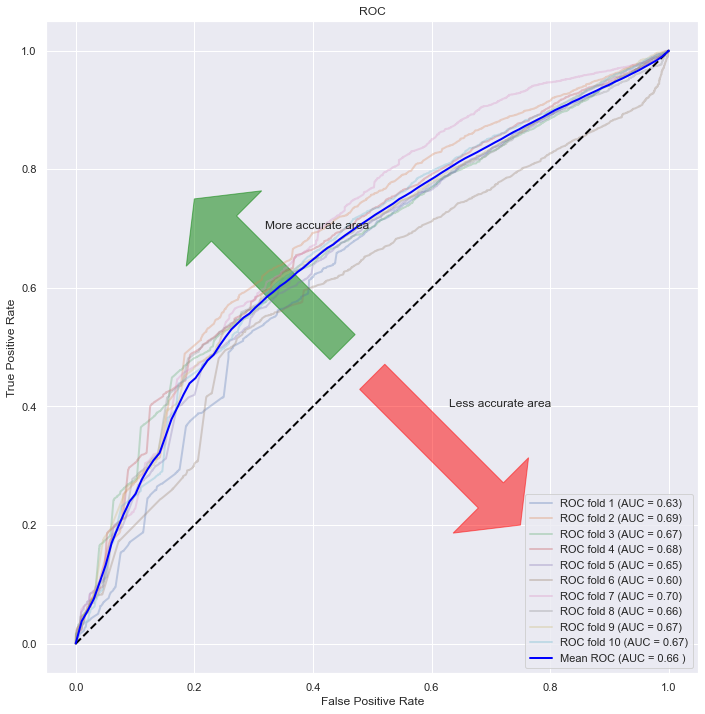

In [54]:
import matplotlib.pyplot as plt
import numpy
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import KFold
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import numpy as np # linear algebra
import pandas as pd

clf = LogisticRegression()
cv = StratifiedKFold(n_splits=10,shuffle=False)

x, y = df[[ 'Age','Alcoholism','Diabetes','Gender',
            'Neighbourhood','Scholarship','Hipertension', 'Handcap','SMS_received',
           'TimeIntervalDuringAppointment']], df['No-show']

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y): 
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<ipython-input-55-28d20c84001a>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-55-28d20c84001a>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-55-28d20c84001a>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-55-28d20c84001a>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-55-28d20c84001a>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-55-28d20c84001a>:23: DeprecationWarning: scipy.interp i

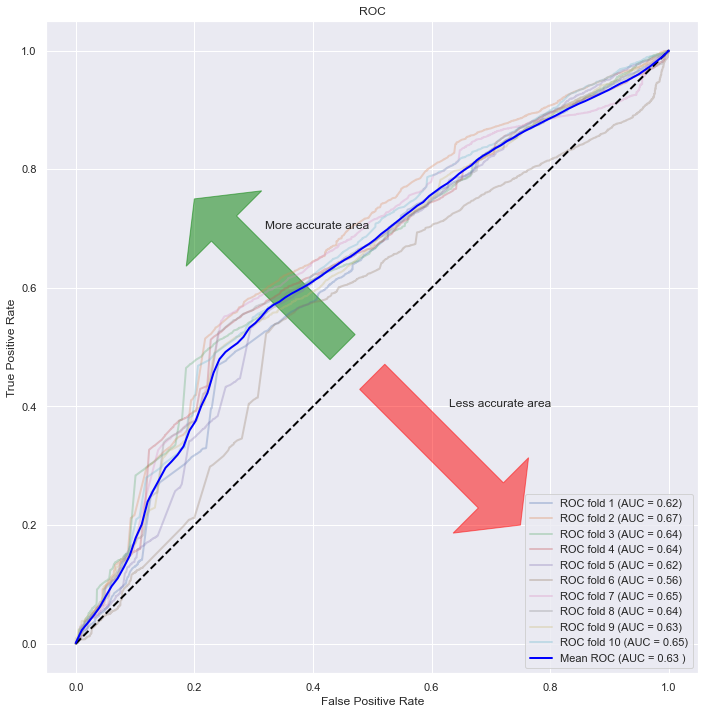

In [55]:
clf = GaussianNB()
cv = StratifiedKFold(n_splits=10,shuffle=False)

x, y = df[[ 'Age','Alcoholism','Diabetes','Gender',
            'Neighbourhood','Scholarship','Hipertension', 'Handcap','SMS_received',
           'TimeIntervalDuringAppointment']], df['No-show']

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y): 
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<ipython-input-56-0e7d23dfe292>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-56-0e7d23dfe292>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-56-0e7d23dfe292>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-56-0e7d23dfe292>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-56-0e7d23dfe292>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-56-0e7d23dfe292>:23: DeprecationWarning: scipy.interp i

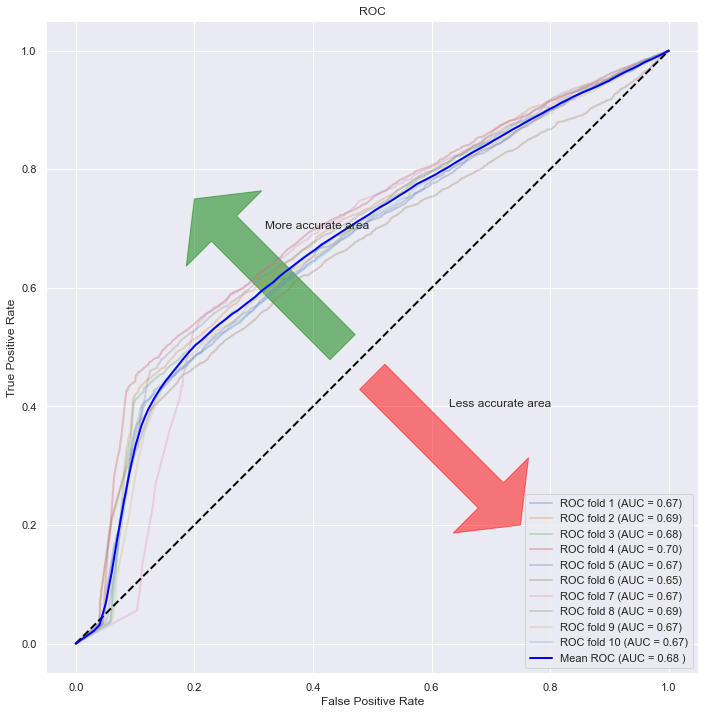

In [56]:
clf = tree.DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=10,shuffle=False)

x, y = df[[ 'Age','Alcoholism','Diabetes','Gender',
            'Neighbourhood','Scholarship','Hipertension', 'Handcap','SMS_received',
           'TimeIntervalDuringAppointment']], df['No-show']

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y): 
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<ipython-input-57-15d79d4045e3>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-57-15d79d4045e3>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-57-15d79d4045e3>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-57-15d79d4045e3>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-57-15d79d4045e3>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-57-15d79d4045e3>:23: DeprecationWarning: scipy.interp i

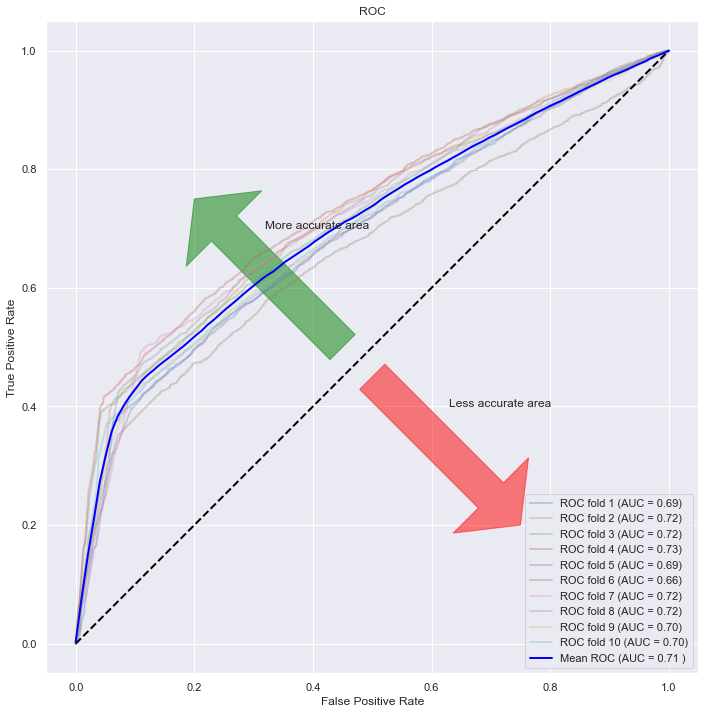

In [57]:
clf = xgb.XGBClassifier(use_label_encoder =False,eval_metric='mlogloss')
cv = StratifiedKFold(n_splits=10,shuffle=False)

x, y = df[[ 'Age','Alcoholism','Diabetes','Gender',
            'Neighbourhood','Scholarship','Hipertension', 'Handcap','SMS_received',
           'TimeIntervalDuringAppointment']], df['No-show']

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y): 
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()